# M1 Paris Physics Master - Numerical Methods Examination 2024


**_Duration 2 hours, no internet browsing, no documents allowed. You should attempt all questions_**

# Student Name 

Murshed SK

### _**Please note**_

Save this notebook file with your name following this format : 

### your_name.ipynb

No spaces, no accents, the only special characters allowed are - or _ 

Particular attention should be paid to the discussions of your results and to the proper and clean formatting of your notebook.

Always label your plots, and quote your numerical results with the appropriate units.

Make your code modular. Write and use functions whenever possible.

### When you have finished : upload your notebook using this link : https://www.dropbox.com/request/kqq8w72XHR5JCTzWHkVA

# 1. Short Course Questions


**1. Provide a short description of the general (deterministic) methodology to calculate numerically the value of an integral.**


**Answer.**<br>
Numerical Integration is useful when the function does not have a simple analytical form (i.e., it can't be expressed using Taylor's series). In this case, we build/use predefined algorithms to solve the numerical value of an integration. Another case is when we have only experimental data points, we can still find the integration values using numerical methods. The choice of the algorithms depends on the behavior of the function within the interval of the integration. Some useful deterministic techniques/algorithms to solve numerical integration are _Riemann Sum_, _Quadrature Rule_, _Trapezoidal Rule_, _Simpson's Rule_, _Montecarlo Method_, etc.

**2. Give a brief definition of "machine precision".**

**Answer.**<br>
Machine precision is the minimum precision/error of a computational machine (PC, Laptop, etc.) that can be differentiated. In other words, it is the maximum positive number that can be added to a number without changing its value. Below this precision, the machine reads it as zero. Mathematically -<br>
 <div align = 'center'>$1_{comp.} + \delta_m \to 1_{comp.}$</div>
For example:<br>
 <div align = 'center'>$1.0 + 10^{-20}({ = \delta_m)} \to 1.0$</div><br>
This is the limiting value of a computer to represent two different float values having the smallest difference.

**3. Explain the principles behind the bisection and Newton-Raphson method for finding the roots of a function. Highlight their difference, advantages and short comings.**

**Answer:**<br>
__Bisection Method:__<br>
In this method, we take two guesses (say, $[a,b]$) for the interval, and then we compute its functional values $(f(a),f(b))$. If $f(a) \cdot f(b) > 0$, then the root(s) doesn't belong to that interval. In that case, we change the interval (i.e. our initial guess) and do the same. When $f(a) \cdot f(b) < 0$, the root(s) lies within the interval. We then bisect the interval $(c = \frac{a+b}{2})$ and find the functional value at that point. If $f(c) = 0$, then it is the root. Otherwise, we find $f(a) \cdot f(c)$. If $f(a) \cdot f(c), 0 $, we assume $b = c$ i.e. the root lies between 'a' and 'c'. Otherwise, $a = c$ i.e. the root lies between 'b' and 'c'. We repeat this process until $\frac{b-a}{2}$ reaches to a very lower value (tolerance).

<br>__Newton-Raphson Method:__<br>
This method requires one guess and the first derivative of the function. The estimated root is given by the formula:
<div align = 'center'> $x_{i + 1} = x_ i - \frac{f(x_i)}{f'(x_i)}$</div>
We try to find $f(x_{x+1} = 0)$, if it is not, then we use the above formula to find the new $x_{i + 1}$. We repeat this process until we find the root of the function.

__Difference__: The bisection method needs two guesses whereas the Newton-Raphson method needs one initial guess.<br>
__Advantage:__ Within the same execution time, the Bisection method needs more iterations whereas the Newton-Raphson method needs very little iteration.

**4. Whats is the difference between an ordinary and a partial diffenrential equation ? Provides example of each (for mathematical writing use either latex writing of any writing you like , but make it clear)**

**Answer**<br>
Ordinary differential equation is defined when there is one dependent variable, whereas partial differential equation is defined when there are two or more dependent variable.<br>
One such Ordinary differential equation is: exponential decay equation: $$\frac{dx}{dt}=-kx$$<br>
One such Partial differential equation is: heat diffusion equation: $$\frac{\partial T}{\partial t}-\frac{K}{\rho Cp}\frac{\partial^2 T}{\partial x^2}=\frac{SK}{\rho Cp}$$<br>

**5. What is an explicit integration scheme ? What is an implicit integration scheme? Provide an example of each.**

**Answer**<br>
In the explicit scheme, the new iterative value is only depends on the previous value. But for the implicit scheme, the newly iterative values is depends on both the previous value as well as the current value.

# 2. Root Finding

#### 2. Use the **bisection method** to find the roots of $f(x) = x^3 - 3x + 1$ 

In [1]:
# Import necesary libraries for this notebook:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function:
def f(x: float) -> float:
    func = x**3 - 3*x +1
    return func

- Plot the function and add appropriate labels

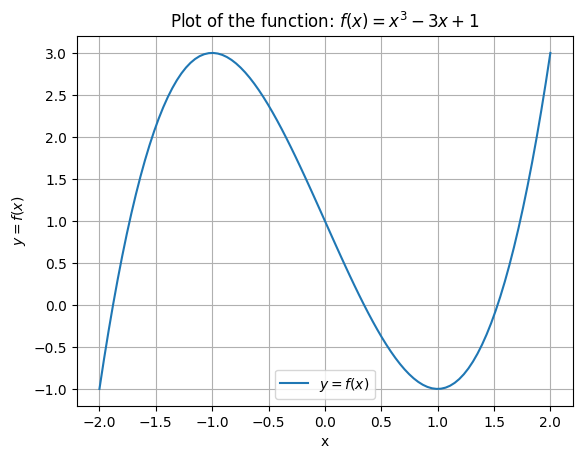

In [3]:
x = np.linspace(-2,2,100)
y = f(x)
# Plot the function
plt.plot(x,y,label = '$y = f(x)$')
plt.xlabel('x')
plt.ylabel('$y = f(x)$')
plt.title('Plot of the function: $f(x) = x^3 - 3x + 1$')
plt.legend()
plt.grid()
plt.show()

- Write a code to find the root of $f(x)$ in the interval $[0,1]$ with an aboslute error (on the value of $f(c)$) of $\varepsilon_{abs} \le 10^{-4}$, where $c$ is the root found numerically.

    - Your code should
        - start the search using the limits of the interval as given above
        - automatically stop when the required error is achieved and print out the resulting root
        - print a table with the values of each iteration following this template

Table header (to be printed once)        
```
print("Iteration | a       | b       | c       | f(c)       | Absolute Error")
print("----------------------------------------------------------------------")
```

To print each iteration you can adapt the following code
```
 print(f"{iteration:<10}| {a:<7.4f} | {b:<7.4f} | {c:<7.4f} | {fc:<10.4f} | {abs_err:<10.4f}")
 ```
where `a` and `b` are the limits of the interval under consideration, `c` is the midpoint, `fc` is the function evaluated at the midpoint, and `abs_err` is the absolute error


In [38]:
# Define the algorithm part of the Bisection method:
def bisection(a ,b ,tolerance):
    """
    Args:
        a: The left endpoint of the interval.
        b: The right endpoint of the interval.
        tolerance: The maximum error allowed.
    Returns:
        True if a root is found within the tolerance, False otherwise.
    """
    if f(a)*f(b)>0:
        print("The root is not in between the interval.")
        return False
    else:
      iteration = 0 
      while (b-a)/2 >tolerance:
        c = (a+b)/2 # The mid point of the interval which is the new end point after iteration.
        if f(c) == 0:
          break # c is the root of the function.
        elif f(a)*f(c)<0:
          b = c # The root lies between 'a' and 'c'.
        else:
          a = c # The root lies between 'b' and 'c'.
        iteration += 1
        # print(f"{iteration:<10}| {a:<7.4f} | {b:<7.4f} | {c:<7.4f} | {f(c):<10.4f} | {abs_err:<10.4f}")
        print(f"Iteration = {iteration}|a = {a:<7.4f}|b = {b:<7.4f}|c = {c:<7.4f}|f(c) = {f(c):<10.4f}|Absolute Error = {((b-a)/2)-tolerance:<10.4f}")    



In [39]:
bisection(0,1,1e-4)

Iteration = 1|a = 0.0000 |b = 0.5000 |c = 0.5000 |f(c) = -0.3750   |Absolute Error = 0.2499    
Iteration = 2|a = 0.2500 |b = 0.5000 |c = 0.2500 |f(c) = 0.2656    |Absolute Error = 0.1249    
Iteration = 3|a = 0.2500 |b = 0.3750 |c = 0.3750 |f(c) = -0.0723   |Absolute Error = 0.0624    
Iteration = 4|a = 0.3125 |b = 0.3750 |c = 0.3125 |f(c) = 0.0930    |Absolute Error = 0.0312    
Iteration = 5|a = 0.3438 |b = 0.3750 |c = 0.3438 |f(c) = 0.0094    |Absolute Error = 0.0155    
Iteration = 6|a = 0.3438 |b = 0.3594 |c = 0.3594 |f(c) = -0.0317   |Absolute Error = 0.0077    
Iteration = 7|a = 0.3438 |b = 0.3516 |c = 0.3516 |f(c) = -0.0112   |Absolute Error = 0.0038    
Iteration = 8|a = 0.3438 |b = 0.3477 |c = 0.3477 |f(c) = -0.0009   |Absolute Error = 0.0019    
Iteration = 9|a = 0.3457 |b = 0.3477 |c = 0.3457 |f(c) = 0.0042    |Absolute Error = 0.0009    
Iteration = 10|a = 0.3467 |b = 0.3477 |c = 0.3467 |f(c) = 0.0016    |Absolute Error = 0.0004    
Iteration = 11|a = 0.3472 |b = 0.3477 |

- Now find the root in the interval $[-2,-1]$

In [40]:
bisection(-2,-1,1e-4)

Iteration = 1|a = -2.0000|b = -1.5000|c = -1.5000|f(c) = 2.1250    |Absolute Error = 0.2499    
Iteration = 2|a = -2.0000|b = -1.7500|c = -1.7500|f(c) = 0.8906    |Absolute Error = 0.1249    
Iteration = 3|a = -2.0000|b = -1.8750|c = -1.8750|f(c) = 0.0332    |Absolute Error = 0.0624    
Iteration = 4|a = -1.9375|b = -1.8750|c = -1.9375|f(c) = -0.4607   |Absolute Error = 0.0312    
Iteration = 5|a = -1.9062|b = -1.8750|c = -1.9062|f(c) = -0.2082   |Absolute Error = 0.0155    
Iteration = 6|a = -1.8906|b = -1.8750|c = -1.8906|f(c) = -0.0861   |Absolute Error = 0.0077    
Iteration = 7|a = -1.8828|b = -1.8750|c = -1.8828|f(c) = -0.0261   |Absolute Error = 0.0038    
Iteration = 8|a = -1.8828|b = -1.8789|c = -1.8789|f(c) = 0.0036    |Absolute Error = 0.0019    
Iteration = 9|a = -1.8809|b = -1.8789|c = -1.8809|f(c) = -0.0112   |Absolute Error = 0.0009    
Iteration = 10|a = -1.8799|b = -1.8789|c = -1.8799|f(c) = -0.0038   |Absolute Error = 0.0004    
Iteration = 11|a = -1.8794|b = -1.8789|

- Why does it take more iterations to reach the same accuracy?

# 3. Problem : Modelisation of Pluto atmosphere 

The aim of the following exercices is to understand the thermal structure of a planet atmosphere.

## Atmospheric structure of Pluto Atmosphere 

Let assume we have a planet, located at some distance from its star. The planet has a radius $R_p$ a mass $M_p$ and a surface temperature $T_s$. The planet has at atmosphere made of a gas with average molar mass (mass of 1 mole) $\mu$
We will consider PLuto (even if this is not really a planet, but a dwarf planet).


We give below some useful numbers :

$R=8.31$ J/mole/K(constant if ideal gases)


$G=6.67 \times 10^{-11} m^3 kg^{-1} s^{-2}$: Universal gravitational constant.

The atmospheric gas is assumed to follow the ideal gas equation of state : 

$P=\rho R T / \mu$

With P=pressure (Pa), $\rho$=density (kg/m^3), T=temperature K.  


PLUTO DATA
$Mp=1.3\times 10^{22} kg$,  $Rp=1185 km$  $T_s=50 K$ (brrr... really cold !)

Surface pressure 

$P_s= 10 $micro bar=1 pascal

Atmospheric composition :$N_2$ : $\mu=14 g/mol$


For convenience, in the following, we call Z the altitude above the planet's surface and R the distance to planet's center,  so Z=R-Rp.


We want to compute the atmospheric pressure P(Z) as a function of Z that is the altitude. In a first step, we will assume that the atmosphere is isothermal, so that T(Z)=cst=$T_S$.

The law of hydrostatic equilibrium tells us that :

$\frac{\partial P}{\partial Z}=-g(z)\rho$ (EQ 1)

where g(z) is the surface acceleration at distance z from the planet's surface

### Q1 :
What is the nature of the hydrostatic equilibrium equation (Eq 1) ? Is it an ODE ? A PDE ? Why ?

Answer: The hydrostatic equilibrium equation is an Ordinary Differential Equation (ODE, since there is only one dependant variable i.e. $Z$.


### Q2 :
using dimensional analysis with g, $\mu$, T, R build a quantity (we will call H) that has the physical dimension of a length. What is the meaning of H in your opinion ?

Answer : $H =\frac{\mu \cdot g}{RT}$



### Q3
what is g at the surface of  Pluto ? 



Gives H for pluto and compare to the planet size. Is it reasonable to assume g constant  on distant H?




We now want to build a code that computes the P(Z) profile, assuming T=cst=$T_s$. We call $P_s$ the pressure at the surface of the planet (Z=0). $P_s= 1$ pascal


Let call dZ the step in Z and $Z_i$=dZ*i. 

Let call 

$P_i=P(Z_i )$ , the pressure at altitude $Z_i$

and 

$\rho_i=P_i \mu/(R T_s)$, the density at altitude $Z_i$

We assume for now that g(z)= constant = g at the surface of Pluto.



### Q4 (really easy)
Write a little piece of code that define all the constants of the problem, including g and H. Pay attention to physical units ! We work using international metric system only (m, Kg, s ,A etc...)... (We are in France, the  country that designed the international metric system !)

In [7]:
# answer 

### Q5

Write a function, called "deriv" that returns dP/dZ and takes in input P and the temperature of the atmosphere (a constant parameter of our problem but we will change later).

In [8]:
# Answer
def deriv(P,T):

    
    

SyntaxError: incomplete input (2020544396.py, line 5)

### Q6   
Describe and explicit first order solver for this type of equation., gives the name. How will you compute $P_{i+1}$ as a function of $P_i$ ? Is it stable and reliable ?
How would you choose dZ for this solver

Answer : 

### Q7   
Describe and explicit second order solver for this type of equation.. How will you compute $P_{i+1}$ as a function of $P_i$ ?
Why is it said to be "second order accurate" ? How many calls to the derivative do you need for one step ?



Answer : 

### Q8
Write a code below that computes P(Z) between Z=0 and Z=Zmax(=2H) and for the initial conditions given above (P=1 pascal at Z=0 m)  that uses the function  deriv. 
The Solver must be Second order accurate. If you do not know how do to that, then choose an 1st order accurate solver. Tell your choice in your code.

### Q9   
how do you choose dz (the integration step) ? propose a value for dZ and explains how you choose it.

What test can you do to make sure that your choice of dZ is correct.


In [ ]:
Answer :

### Q10
Display P(Z) between Z=0 and Z=2H, with the X legend, Y legend, and put your value of dZ in the title.


What is the Pressure at Z=2H ?


Answer :

## More realistic profile, where g is not constant.

Now we will consider that g changes with altitude. so that $g(Z)=GMp/(Rp+Z)^2$. Modify your function "deriv" (define above) so that g is now properly calculated in the code and takes into account the g variation with Z. Note that deriv now will take in input P, Z, T. We will call this function "deriv2"


In [ ]:
def deriv2(P,T,Z):


### Q11 
Write a code that compute P(Z) with deriv2.



### Q12
Compute P(Z) with deriv and deriv2. Display the resuls on the same graph as the previous function that compute P(Z) asuming g is constant . 
Display the two cruves on the same graph with different colors.


In [ ]:
Answer :

### Q13  
What is the maximum error that is done on P(Z) if we assume that g is constant ?

Answer :

**When you have finished : upload your notebook to this link : https://www.dropbox.com/request/kqq8w72XHR5JCTzWHkVA**